<font size="9">SchedTune on JUNO</font><br>
<hr>

In [1]:
import logging
reload(logging)
logging.basicConfig(
    format='%(asctime)-9s %(levelname)-8s: %(message)s',
    datefmt='%I:%M:%S')

# Enable logging at INFO level
logging.getLogger().setLevel(logging.INFO)

In [61]:
# Generate plots inline
%pylab inline

import json
import os
import pandas as pd

# Support for performance analysis of RTApp workloads
from trace_analysis import TraceAnalysis

# Support for trace events analysis
from trace import Trace
from perf_analysis import PerfAnalysis

# Suport for FTrace events parsing and visualization
import trappy

Populating the interactive namespace from numpy and matplotlib


# Test setup

In [62]:
# Base folder where tests folder are located
res_dir_pelt = '../../results/stune_ramp_pelt/'
logging.info('Content of the output folder %s', res_dir_pelt)
!tree {res_dir_pelt}

03:12:41  INFO    : Content of the output folder ../../results/stune_ramp_pelt/


../../results/stune_ramp_pelt/
├── rtapp:boost15:mixprof
│   ├── 1
│   │   ├── energy.json
│   │   ├── mixprof_00.json
│   │   ├── output.log
│   │   ├── rt-app-task_r5_10-60-0.log
│   │   ├── trace.dat
│   │   ├── trace.raw.txt
│   │   └── trace.txt
│   ├── kernel.config
│   ├── kernel.version
│   └── platform.json
├── rtapp:boost30:mixprof
│   ├── 1
│   │   ├── energy.json
│   │   ├── mixprof_00.json
│   │   ├── output.log
│   │   ├── rt-app-task_r5_10-60-0.log
│   │   └── trace.dat
│   ├── kernel.config
│   ├── kernel.version
│   └── platform.json
├── rtapp:boost60:mixprof
│   ├── 1
│   │   ├── energy.json
│   │   ├── mixprof_00.json
│   │   ├── output.log
│   │   ├── rt-app-task_r5_10-60-0.log
│   │   └── trace.dat
│   ├── kernel.config
│   ├── kernel.version
│   └── platform.json
└── rtapp:noboost:mixprof
    ├── 1
    │   ├── cluster_freqs.png
    │   ├── energy.json
    │   ├── mixprof_00.json
    │   ├── output.log
    │   ├── rt-app-task_r5_10-60-0.log
    │   ├── task_perf_ta

In [63]:
# Base folder where tests folder are located
res_dir_walt = '../../results/stune_ramp_walt/'
logging.info('Content of the output folder %s', res_dir_walt)
!tree {res_dir_walt}

03:12:42  INFO    : Content of the output folder ../../results/stune_ramp_walt/


../../results/stune_ramp_walt/
├── rtapp:boost15:mixprof
│   ├── 1
│   │   ├── energy.json
│   │   ├── mixprof_00.json
│   │   ├── output.log
│   │   ├── rt-app-task_r5_10-60-0.log
│   │   ├── trace.dat
│   │   ├── trace.raw.txt
│   │   └── trace.txt
│   ├── kernel.config
│   ├── kernel.version
│   └── platform.json
├── rtapp:boost30:mixprof
│   ├── 1
│   │   ├── energy.json
│   │   ├── mixprof_00.json
│   │   ├── output.log
│   │   ├── rt-app-task_r5_10-60-0.log
│   │   └── trace.dat
│   ├── kernel.config
│   ├── kernel.version
│   └── platform.json
├── rtapp:boost60:mixprof
│   ├── 1
│   │   ├── energy.json
│   │   ├── mixprof_00.json
│   │   ├── output.log
│   │   ├── rt-app-task_r5_10-60-0.log
│   │   └── trace.dat
│   ├── kernel.config
│   ├── kernel.version
│   └── platform.json
└── rtapp:noboost:mixprof
    ├── 1
    │   ├── cluster_freqs.png
    │   ├── energy.json
    │   ├── mixprof_00.json
    │   ├── output.log
    │   ├── rt-app-task_r5_10-60-0.log
    │   ├── task_perf_ta

In [64]:
with open(os.path.join(res_dir_pelt, 'rtapp:noboost:mixprof', 'platform.json'), 'r') as fh:
    platform = json.load(fh)
#print json.dumps(platform, indent=4)
logging.info('LITTLE cluster max capacity: %d',
             platform['nrg_model']['little']['cpu']['cap_max'])

03:12:43  INFO    : LITTLE cluster max capacity: 593


# Configuration

In [65]:
# Full analysis function
def analysis(test_id, t_min=None, t_max=None, res_dir=res_dir_pelt):
    
    test_dir = '{}/rtapp:{}:mixprof'.format(res_dir, test_id)
    run_dir = '{}/1/'.format(test_dir)
    platform_json = '{}/platform.json'.format(test_dir)
    trace_file = '{}/trace.dat'.format(run_dir)
    
    # Load platform description data
    with open(platform_json, 'r') as fh:
        platform = json.load(fh)

    # Load RTApp Performance data
    pa = PerfAnalysis(run_dir)
    logging.info("Loaded performance data for tasks: %s", pa.tasks())
    
    # Load Trace data
    events = [
        "sched_switch",
        "sched_contrib_scale_f",
        "sched_load_avg_cpu",
        "sched_load_avg_task",
        "sched_tune_tasks_update",
        "sched_boost_cpu",
        "sched_boost_task",
        "sched_energy_diff",
        "cpu_frequency",
        "cpu_capacity"
    ]
    trace = Trace(platform, run_dir, events, tasks=pa.tasks())
    ta = TraceAnalysis(trace, tasks=pa.tasks())
    
    # Define time ranges for all the temporal plots
    ta.setXTimeRange(t_min, t_max)
    
    # Tasks plots
    ta.plotTasks()
    for task in pa.tasks():
        pa.plotPerf(task)

    # Cluster and CPUs plots
    ta.plotClusterFrequencies()


05:17:02  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
05:17:02  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
05:17:02  INFO    : Parsing FTrace format...


PELT


05:17:03  INFO    :   task    task_r5_10-60 found, pid: [7820]
05:17:03  INFO    : Collected events spans a 20.085 [s] time interval
05:17:03  INFO    : Parsing FTrace format...


Maximum estimated system energy: 1727
WALT


05:17:04  INFO    :   task    task_r5_10-60 found, pid: [8541]
05:17:04  INFO    : Collected events spans a 20.123 [s] time interval
05:17:04  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
05:17:04  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
05:17:04  INFO    : Parsing FTrace format...


Maximum estimated system energy: 1727
PELT


05:17:05  INFO    :   task    task_r5_10-60 found, pid: [7820]
05:17:05  INFO    : Collected events spans a 20.085 [s] time interval
05:17:05  INFO    : Parsing FTrace format...


Maximum estimated system energy: 1727
WALT


05:17:06  INFO    :   task    task_r5_10-60 found, pid: [8541]
05:17:06  INFO    : Collected events spans a 20.123 [s] time interval


Maximum estimated system energy: 1727


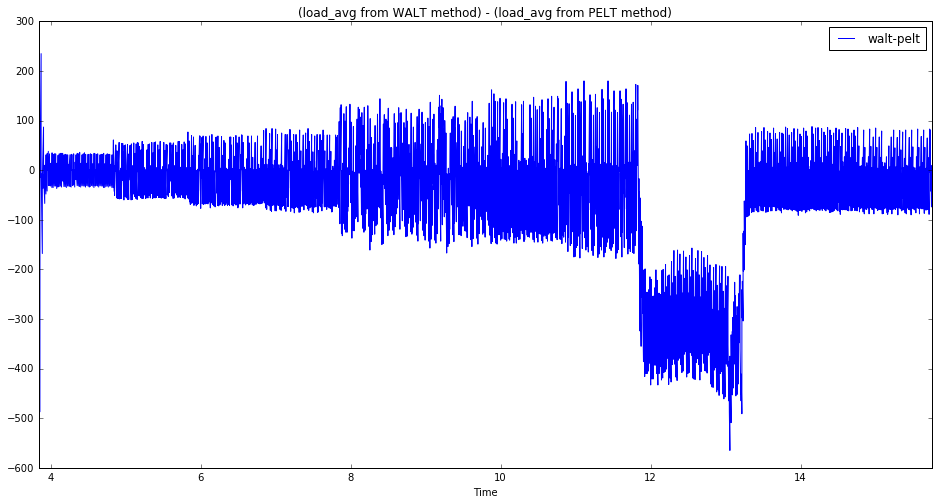

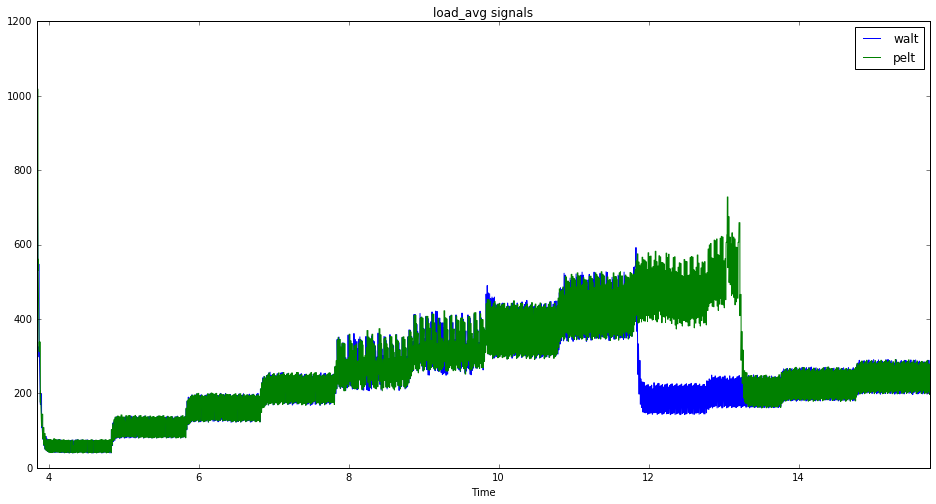

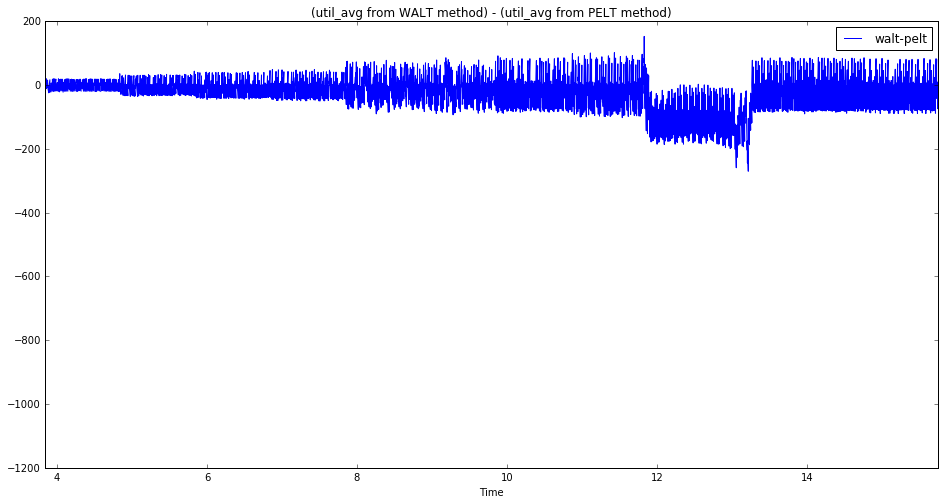

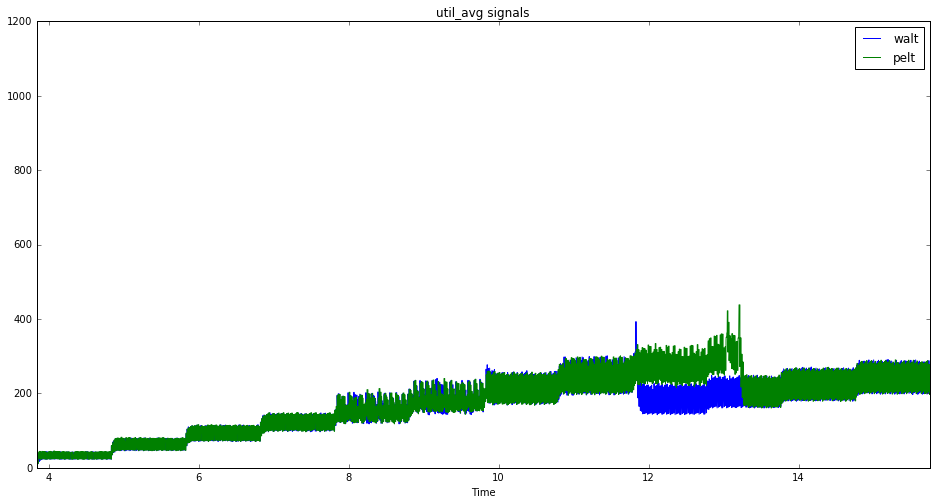

In [114]:
def pelt_vs_walt(signal='util_avg'):
    test_dir_pelt = '{}/rtapp:{}:mixprof'.format(res_dir_pelt, 'noboost')
    test_dir_walt = '{}/rtapp:{}:mixprof'.format(res_dir_walt, 'noboost')
    run_dir_pelt = '{}/1/'.format(test_dir_pelt)
    run_dir_walt = '{}/1/'.format(test_dir_walt)
    platform_json_pelt = '{}/platform.json'.format(test_dir_pelt)
    platform_json_walt = '{}/platform.json'.format(test_dir_walt)
    trace_file_pelt = '{}/trace.dat'.format(run_dir_pelt)
    trace_file_walt = '{}/trace.dat'.format(run_dir_walt)
    
    # Load platform description data
    with open(platform_json_pelt, 'r') as fh:
        platform_pelt = json.load(fh)
    with open(platform_json_walt, 'r') as fh:
        platform_walt = json.load(fh)

    # Load RTApp Performance data
    pa_pelt = PerfAnalysis(run_dir_pelt)
    logging.info("Loaded performance data for tasks: %s", pa_pelt.tasks())
    pa_walt = PerfAnalysis(run_dir_walt)
    logging.info("Loaded performance data for tasks: %s", pa_walt.tasks())
    
    # Load Trace data
    events = [
        "sched_switch",
        "sched_contrib_scale_f",
        "sched_load_avg_cpu",
        "sched_load_avg_task",
        "sched_tune_tasks_update",
        "sched_boost_cpu",
        "sched_boost_task",
        "sched_energy_diff",
        "cpu_frequency",
        "cpu_capacity"
    ]
    print 'PELT'
    trace_pelt = Trace(platform_pelt, run_dir_pelt, events, tasks=pa_pelt.tasks())
    print 'WALT'
    trace_walt = Trace(platform_walt, run_dir_walt, events, tasks=pa_walt.tasks())
    
    metric=signal
    metric_pelt=metric+'_pelt'
    metric_walt=metric+'_walt'
    # make a diff plot of '(load_avg from WALT method) - (load_avg from PELT method)'
    df_pelt=trace_pelt.ftrace.sched_load_avg_task.data_frame[['pid', metric]]
    df_walt=trace_walt.ftrace.sched_load_avg_task.data_frame[['pid', metric]]
    pelt_pid=trace_pelt.tasks[pa_pelt.tasks()[0]]['pid']
    walt_pid=trace_walt.tasks[pa_walt.tasks()[0]]['pid']
    df_pelt_loadavg=df_pelt.loc[df_pelt['pid']==pelt_pid][[metric]]
    df_walt_loadavg=df_walt.loc[df_walt['pid']==walt_pid][[metric]]
    
    merged=df_pelt_loadavg.append(df_walt_loadavg.rename(columns={metric:metric_walt})).sort_index()
    
    last_pelt=1024
    last_walt=1024
    times=[]
    diff=[]
    merged_hold=[]
    pelt_vals=[]
    walt_vals=[]
    for row in merged.itertuples():
        index,pelt,walt=row
        if pd.isnull(pelt):
            pelt = last_pelt
        else:
            last_pelt = pelt
        if pd.isnull(walt):
            walt = last_walt
        else:
            last_walt = walt
        times.append(index)
        pelt_vals.append(pelt)
        walt_vals.append(walt)
        diff.append(walt-pelt)
        merged_hold.append((index, pelt, walt))
    
    diff_df=pd.DataFrame({'Time':times, 'walt-pelt':diff}, columns=['Time', 'walt-pelt'])
    diff_df.plot(x='Time', y='walt-pelt',figsize=(16,8), title='({} from WALT method) - ({} from PELT method)'.format(metric, metric))
    merged_df=pd.DataFrame({'Time':times, 'walt':walt_vals, 'pelt': pelt_vals}, columns=['Time', 'walt', 'pelt'])
    merged_df.plot(x='Time', figsize=(16,8), title='{} signals'.format(metric))

pelt_vs_walt(signal='load_avg')
pelt_vs_walt(signal='util_avg')


# Results

## No Boosting

02:10:08  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
02:10:08  INFO    : Parsing FTrace format...


PELT


02:10:09  INFO    :   task    task_r5_10-60 found, pid: [7820]
02:10:09  INFO    : Collected events spans a 20.085 [s] time interval
02:10:09  INFO    : Set plots time range to (0.000000, 20.084907)[s]
02:10:09  INFO    : Set plots time range to (0.000000, 20.084907)[s]
02:10:09  INFO    :   task    task_r5_10-60 found, pid: [7820]
02:10:09  INFO    : 474 593 819 1024
02:10:09  WARNING : Events [sched_overutilized] not found, plot DISABLED!
02:10:09  WARNING : Events [sched_overutilized] not found, plot DISABLED!


Maximum estimated system energy: 1727


02:10:09  WARNING : Events [sched_overutilized] not found, plot DISABLED!
02:10:09  INFO    : PerfIndex, Task [task_r5_10-60] avg: 0.90, std: 0.19
02:10:10  WARNING : Events [sched_overutilized] not found, plot DISABLED!
02:10:10  WARNING : Events [sched_overutilized] not found, plot DISABLED!
02:10:10  INFO    : LITTLE cluster average frequency: 0.644 GHz
02:10:10  INFO    : big    cluster average frequency: 0.607 GHz


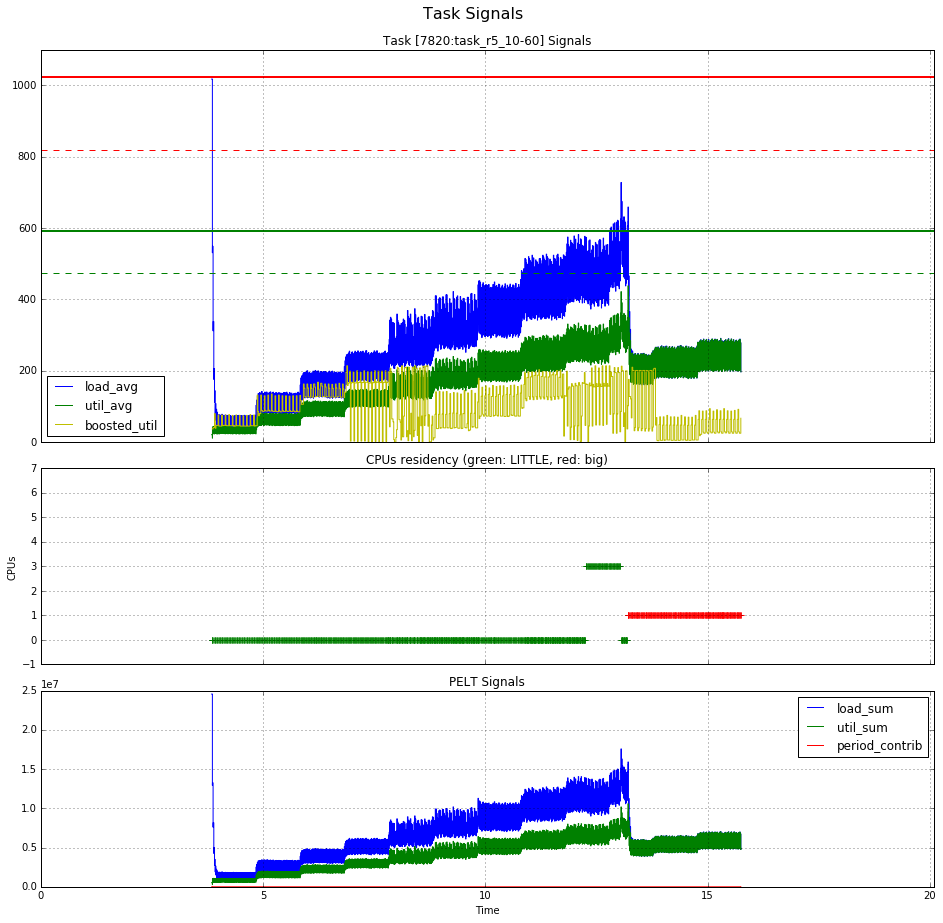

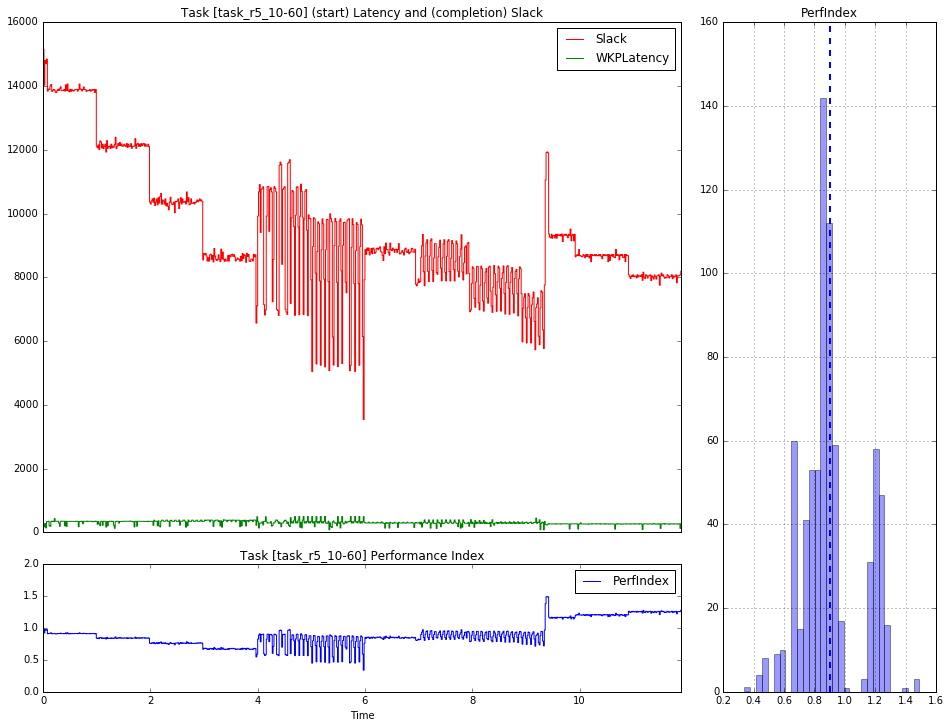

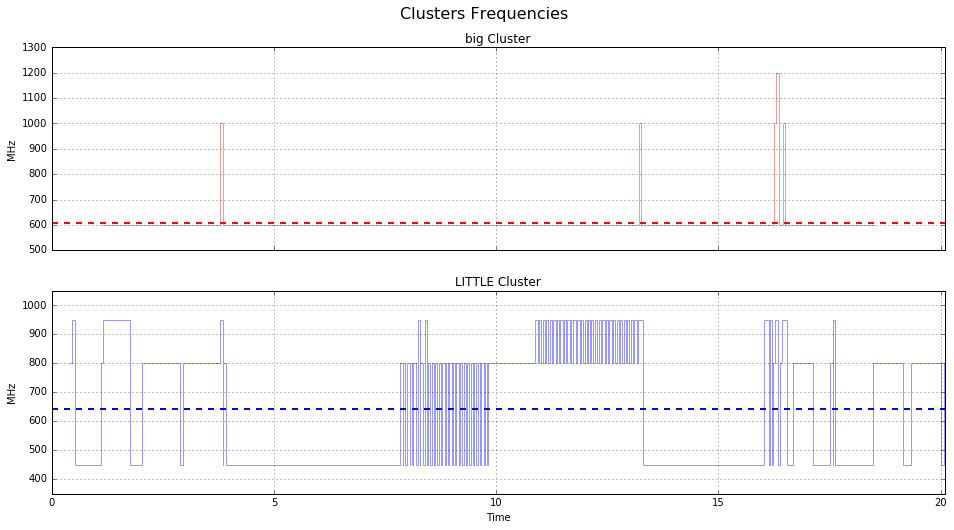

In [11]:
print 'PELT'
analysis('noboost')

02:10:20  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
02:10:20  INFO    : Parsing FTrace format...


WALT


02:10:21  INFO    :   task    task_r5_10-60 found, pid: [8541]
02:10:21  INFO    : Collected events spans a 20.123 [s] time interval
02:10:21  INFO    : Set plots time range to (0.000000, 20.123218)[s]
02:10:21  INFO    : Set plots time range to (0.000000, 20.123218)[s]
02:10:21  INFO    :   task    task_r5_10-60 found, pid: [8541]
02:10:21  INFO    : 474 593 819 1024
02:10:21  WARNING : Events [sched_overutilized] not found, plot DISABLED!
02:10:21  WARNING : Events [sched_overutilized] not found, plot DISABLED!


Maximum estimated system energy: 1727


02:10:21  WARNING : Events [sched_overutilized] not found, plot DISABLED!
02:10:22  INFO    : PerfIndex, Task [task_r5_10-60] avg: 0.94, std: 0.20
02:10:22  WARNING : Events [sched_overutilized] not found, plot DISABLED!
02:10:22  WARNING : Events [sched_overutilized] not found, plot DISABLED!
02:10:23  INFO    : LITTLE cluster average frequency: 0.608 GHz
02:10:23  INFO    : big    cluster average frequency: 0.602 GHz


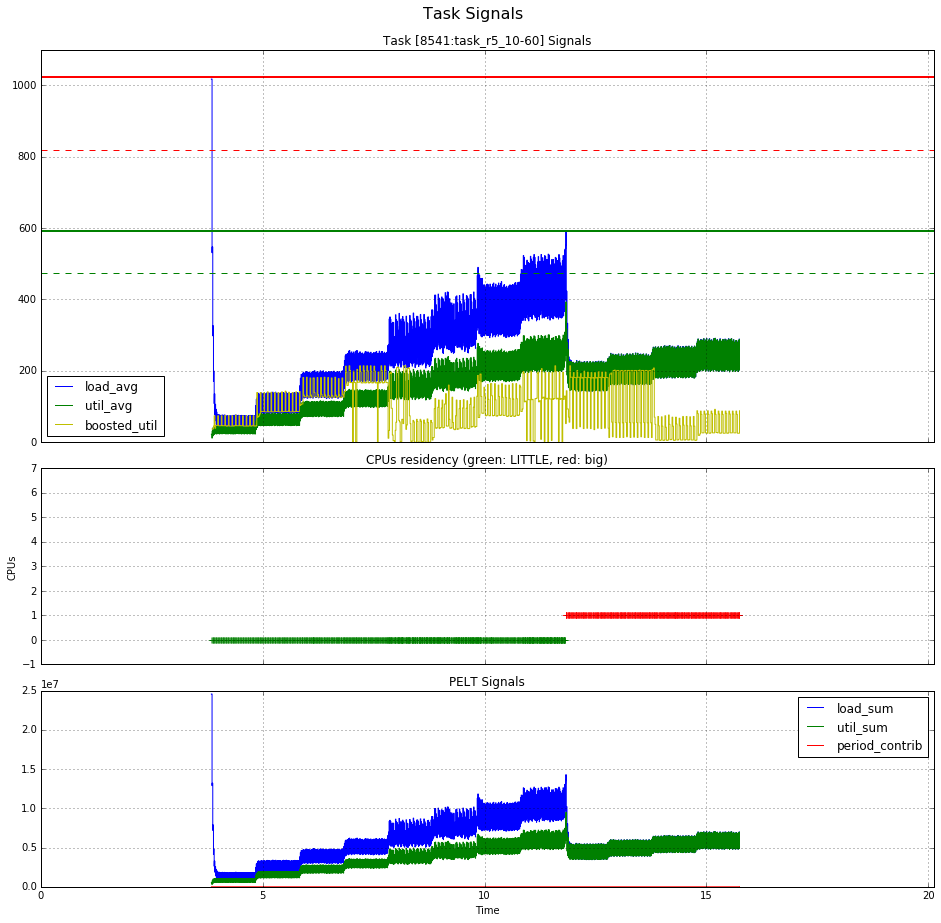

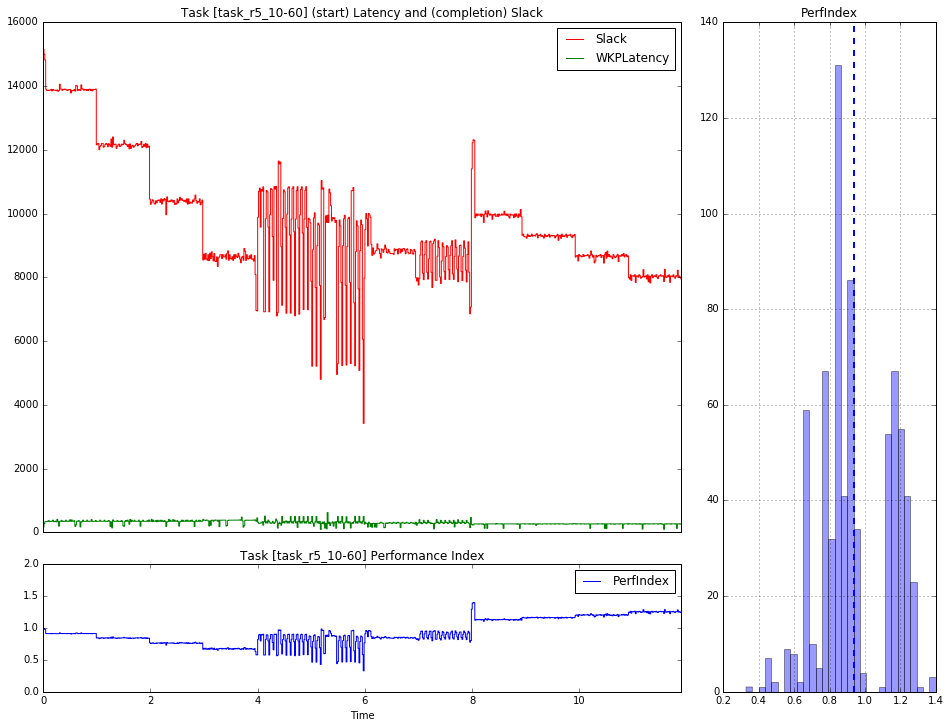

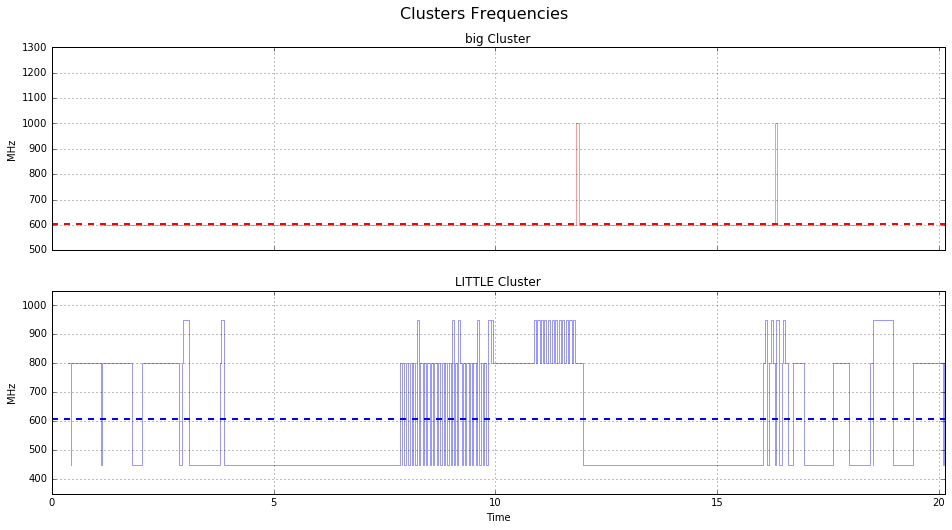

In [12]:
print 'WALT'
analysis('noboost', res_dir=res_dir_walt)


## Boost 15%

In [ ]:
analysis('boost15')

## Boost 30%

In [ ]:
analysis('boost30')

## Boost 60%

In [ ]:
analysis('boost60')